# Figures
Author: Mark Bauer

In [1]:
# import libraries
import duckdb
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from datetime import datetime

In [2]:
# reproducibility
%reload_ext watermark
%watermark -v -p duckdb,pandas,geopandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

duckdb    : 1.0.0
pandas    : 1.5.1
geopandas : 0.12.1
matplotlib: 3.6.2
seaborn   : 0.12.1



In [3]:
# data retrieved
current_date = datetime.now()
print(f"This notebook was executed on {current_date.strftime('%Y-%m-%d')}.")

This notebook was executed on 2024-10-07.


# Read In Data

In [4]:
# duckdb connection
con = duckdb.connect()

# create public_assistance table
con.execute("""
    CREATE TABLE public_assistance AS
    FROM read_parquet('data/public-assistance.parquet')
"""
)

# sanity check
sql = """
    SELECT *
    FROM public_assistance
    LIMIT 10
"""

con.sql(sql)

┌────────────────┬─────────────────────┬──────────────┬───┬──────────────────────┬──────────────────────┐
│ disasterNumber │   declarationDate   │ incidentType │ … │         hash         │          id          │
│     int64      │      timestamp      │   varchar    │   │       varchar        │       varchar        │
├────────────────┼─────────────────────┼──────────────┼───┼──────────────────────┼──────────────────────┤
│           4023 │ 2011-09-02 00:00:00 │ Hurricane    │ … │ 5ff26ea21f9af4de5d…  │ d247f735-5e5d-4d47…  │
│           4155 │ 2013-11-08 00:00:00 │ Severe Storm │ … │ 39a1559d2dd1a04afa…  │ 39552c91-2dc1-4519…  │
│           4226 │ 2015-06-26 00:00:00 │ Severe Storm │ … │ aef455b4030e92d3c7…  │ d02b7bb6-fb6c-4fb4…  │
│           4314 │ 2017-05-22 00:00:00 │ Severe Storm │ … │ 727e5a2e3628d483b2…  │ 044e88f1-b38e-483c…  │
│           4337 │ 2017-09-10 00:00:00 │ Hurricane    │ … │ ab453e975b05cc1163…  │ 98731455-3b88-4fc0…  │
│           4480 │ 2020-03-20 00:00:00 │ Biolo

# Describe and Summarize Data

In [5]:
# count rows
con.sql("SELECT COUNT(id) AS count_rows FROM public_assistance")

┌────────────┐
│ count_rows │
│   int64    │
├────────────┤
│     796325 │
└────────────┘

In [6]:
# examine column datatypes
sql = "DESCRIBE SELECT * FROM public_assistance"
describe_relation = con.sql(sql)

(con
 .sql("SELECT column_name, column_type FROM describe_relation")
 .show(max_rows=50)
)

┌───────────────────────┬─────────────┐
│      column_name      │ column_type │
│        varchar        │   varchar   │
├───────────────────────┼─────────────┤
│ disasterNumber        │ BIGINT      │
│ declarationDate       │ TIMESTAMP   │
│ incidentType          │ VARCHAR     │
│ pwNumber              │ BIGINT      │
│ applicationTitle      │ VARCHAR     │
│ applicantId           │ VARCHAR     │
│ damageCategoryCode    │ VARCHAR     │
│ projectSize           │ VARCHAR     │
│ county                │ VARCHAR     │
│ countyCode            │ BIGINT      │
│ state                 │ VARCHAR     │
│ stateCode             │ VARCHAR     │
│ stateNumberCode       │ BIGINT      │
│ projectAmount         │ DOUBLE      │
│ federalShareObligated │ DOUBLE      │
│ totalObligated        │ DOUBLE      │
│ obligatedDate         │ TIMESTAMP   │
│ dcc                   │ VARCHAR     │
│ damageCategory        │ VARCHAR     │
│ lastRefresh           │ TIMESTAMP   │
│ hash                  │ VARCHAR     │


In [7]:
# summary statistics
sql = "SUMMARIZE SELECT * FROM public_assistance"
summarize_relation = con.sql(sql)

summarize_relation.df()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,disasterNumber,BIGINT,1239,4828,1649,2635.9075729130695,1278.8416570699048,1603,1855,4133,796325,0.00
1,declarationDate,TIMESTAMP,1998-08-26 00:00:00,2024-09-28 00:00:00,1266,None,None,None,None,None,796325,0.00
2,incidentType,VARCHAR,Biological,Winter Storm,28,None,None,None,None,None,796325,0.00
3,pwNumber,BIGINT,1,99995,20071,1655.649565190092,2814.094876750108,191,597,1722,796325,0.00
4,applicationTitle,VARCHAR,\t1-30 day debris removal,"¿Public Health Division 14, July 6, 2021 thru ...",527114,None,None,None,None,None,796325,0.78
5,applicantId,VARCHAR,000-00000-01,999-99999-99,67665,None,None,None,None,None,796325,0.00
6,damageCategoryCode,VARCHAR,A - Debris Removal,Z - State Management,16,None,None,None,None,None,796325,0.00
7,projectSize,VARCHAR,Large,Small,2,None,None,None,None,None,796325,1.63
8,county,VARCHAR,Abbeville,Ziebach,3556,None,None,None,None,None,796325,1.70
9,countyCode,BIGINT,0,66010,334,72.4593517056313,200.01284616209148,14,54,105,796325,1.63


In [8]:
# examine NULL percentage
sql = """
    SELECT column_name, column_type, null_percentage
    FROM summarize_relation
    ORDER BY null_percentage DESC
"""

con.sql(sql).show(max_rows=50)

┌───────────────────────┬─────────────┬─────────────────┐
│      column_name      │ column_type │ null_percentage │
│        varchar        │   varchar   │  decimal(9,2)   │
├───────────────────────┼─────────────┼─────────────────┤
│ county                │ VARCHAR     │            1.70 │
│ projectSize           │ VARCHAR     │            1.63 │
│ countyCode            │ BIGINT      │            1.63 │
│ applicationTitle      │ VARCHAR     │            0.78 │
│ disasterNumber        │ BIGINT      │            0.00 │
│ declarationDate       │ TIMESTAMP   │            0.00 │
│ incidentType          │ VARCHAR     │            0.00 │
│ pwNumber              │ BIGINT      │            0.00 │
│ applicantId           │ VARCHAR     │            0.00 │
│ damageCategoryCode    │ VARCHAR     │            0.00 │
│ state                 │ VARCHAR     │            0.00 │
│ stateCode             │ VARCHAR     │            0.00 │
│ stateNumberCode       │ BIGINT      │            0.00 │
│ projectAmoun

In [9]:
# examine project amounts and obligations columns
sql = """
    SELECT *
    FROM summarize_relation
    WHERE column_name IN ('projectAmount', 'federalShareObligated', 'totalObligated')
"""

con.sql(sql).df()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,projectAmount,DOUBLE,-372687108.0,9053782360.01,599176,337685.5380923234,15388499.00872625,3935.2610810034366,11983.212864809057,42987.68671351983,796325,0.0
1,federalShareObligated,DOUBLE,-372687108.0,9053782360.01,624636,307022.90689475223,14512348.296046564,3134.257783223326,9609.078244901171,34888.59209989706,796325,0.0
2,totalObligated,DOUBLE,-376423296.25,9053782360.01,659122,307793.1973364421,14516713.103041718,3221.809271192551,9848.066826060583,35788.29368822588,796325,0.0


# Preview Values

In [10]:
sql = """
    SELECT *
    FROM public_assistance
    LIMIT 5   
"""

con.sql(sql).df().iloc[:, :12]

,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,projectSize,county,countyCode,state,stateCode
0,4023,2011-09-02,Hurricane,247,MCMDG00 Trumbull Ave Revetment,009-47500-00,G - Recreational or Other,Large,New Haven,9,Connecticut,CT
1,4155,2013-11-08,Severe Storm,173,SG107 - Donated Resources,093-62100-00,B - Protective Measures,Small,Meade,93,South Dakota,SD
2,4226,2015-06-26,Severe Storm,62,SCT002C - Roads and Culverts,127-99127-00,C - Roads and Bridges,Large,Scott,127,Arkansas,AR
3,4314,2017-05-22,Severe Storm,14,DUARW01 - PAAP Debris Removal 1-30 Days,051-20500-00,A - Debris Removal,Large,Holmes,51,Mississippi,MS
4,4337,2017-09-10,Hurricane,6679,Zoo Exhibit and Trail Repairs,099-UXTQE-00,"G - Parks, Recreational Facilities, and Other ...",Large,Palm Beach County,99,Florida,FL


In [11]:
con.sql(sql).df().iloc[:, 12:]

,stateNumberCode,projectAmount,federalShareObligated,totalObligated,obligatedDate,dcc,damageCategory,lastRefresh,hash,id
0,9,614291.00,614291.00,614291.00,2012-04-05,G,Recreational or Other,2024-03-23 17:02:09.387,5ff26ea21f9af4de5dce40c1f4ab2324b11b5fcb,d247f735-5e5d-4d47-9b4b-58a2fa6396b4
1,46,20739.92,16506.90,16506.90,2024-03-22,B,Protective Measures,2024-03-23 17:02:09.387,39a1559d2dd1a04afafdcde601838082c65b4729,39552c91-2dc1-4519-87fb-b6beb815a0ad
2,5,205754.79,154316.09,154316.09,2015-12-08,C,Roads and Bridges,2024-03-23 17:02:09.387,aef455b4030e92d3c7219138d3456fcebdd789bf,d02b7bb6-fb6c-4fb4-a029-58fdfc9848f9
3,28,2115399.61,1687334.81,1687334.81,2017-07-21,A,Debris Removal,2024-03-23 17:02:09.387,727e5a2e3628d483b2ac6407f48663a3a69a144e,044e88f1-b38e-483c-b579-80a60c6a10fa
4,12,137858.93,124077.54,124077.54,2020-01-24,G,"Parks, Recreational Facilities, and Other Items",2024-09-06 15:04:53.183,ab453e975b05cc11633455ccde7607fdd24ff1ca,98731455-3b88-4fc0-af7f-dae089378537


# Figures

**Table xx.** Top 20 Public Assistance Projects by Highest Total Obligated Amount

In [12]:
sql = """
    SELECT
        disasterNumber,
        substring(declarationDate::VARCHAR, 1, 4) as year,
        state,
        incidentType,
        SUM(totalObligated) AS totalObligated
    FROM
        public_assistance
    GROUP BY ALL
    ORDER BY totalObligated DESC
    LIMIT 20
"""

relation = con.sql(sql).df()

disasters_df = con.sql("""
    SELECT
        row_number() OVER () AS rank,
        disasterNumber,
        state,
        year,
        incidentType,
        ROUND(totalObligated / 1_000_000, 0)::INT AS totalObligatedM
    FROM relation
""").df()


print(disasters_df.shape)
disasters_df

(20, 6)


,rank,disasterNumber,state,year,incidentType,totalObligatedM
0,1,4339,Puerto Rico,2017,Hurricane,33898
1,2,4480,New York,2020,Biological,15592
2,3,4340,Virgin Islands,2017,Hurricane,15586
3,4,4485,Texas,2020,Biological,14931
4,5,4085,New York,2012,Hurricane,14740
5,6,1603,Louisiana,2005,Hurricane,13668
6,7,4482,California,2020,Biological,11830
7,8,1391,New York,2001,Fire,4733
8,9,4486,Florida,2020,Biological,3694
9,10,1604,Mississippi,2005,Hurricane,3219


In [13]:
print(disasters_df.to_markdown(index=False))

|   rank |   disasterNumber | state          |   year | incidentType   |   totalObligatedM |
|-------:|-----------------:|:---------------|-------:|:---------------|------------------:|
|      1 |             4339 | Puerto Rico    |   2017 | Hurricane      |             33898 |
|      2 |             4480 | New York       |   2020 | Biological     |             15592 |
|      3 |             4340 | Virgin Islands |   2017 | Hurricane      |             15586 |
|      4 |             4485 | Texas          |   2020 | Biological     |             14931 |
|      5 |             4085 | New York       |   2012 | Hurricane      |             14740 |
|      6 |             1603 | Louisiana      |   2005 | Hurricane      |             13668 |
|      7 |             4482 | California     |   2020 | Biological     |             11830 |
|      8 |             1391 | New York       |   2001 | Fire           |              4733 |
|      9 |             4486 | Florida        |   2020 | Biological    

**Table xx.** Top 20 Public Assistance Project by Highest Total Obligated Amount per Incident Type

In [14]:
sql = """
    SELECT
        DISTINCT ON (incidentType)
        disasterNumber,
        substring(declarationDate::VARCHAR, 1, 4) as year,
        state,
        incidentType,
        SUM(totalObligated) AS totalObligated
    FROM
        public_assistance
    GROUP BY ALL
    ORDER BY totalObligated DESC
"""

relation = con.sql(sql).df()

disasters_df = con.sql("""
    SELECT
        incidentType,
        disasterNumber,
        state,
        year,
        ROUND(totalObligated / 1_000_000, 2) AS totalObligatedM
    FROM relation
    ORDER BY incidentType
""").df()

print(disasters_df.shape)
disasters_df

(28, 5)


,incidentType,disasterNumber,state,year,totalObligatedM
0,Biological,4480,New York,2020,15592.37
1,Chemical,3366,West Virginia,2014,1.64
2,Coastal Storm,1379,Texas,2001,433.65
3,Dam/Levee Break,1529,California,2004,21.03
4,Drought,3276,Federated States of Micronesia,2007,0.08
5,Earthquake,4473,Puerto Rico,2020,947.52
6,Fire,1391,New York,2001,4732.56
7,Flood,4308,California,2017,820.38
8,Freezing,1468,Maine,2003,1.74
9,Hurricane,4339,Puerto Rico,2017,33898.12


In [15]:
print(disasters_df.to_markdown(index=False))

| incidentType                    |   disasterNumber | state                          |   year |   totalObligatedM |
|:--------------------------------|-----------------:|:-------------------------------|-------:|------------------:|
| Biological                      |             4480 | New York                       |   2020 |          15592.4  |
| Chemical                        |             3366 | West Virginia                  |   2014 |              1.64 |
| Coastal Storm                   |             1379 | Texas                          |   2001 |            433.65 |
| Dam/Levee Break                 |             1529 | California                     |   2004 |             21.03 |
| Drought                         |             3276 | Federated States of Micronesia |   2007 |              0.08 |
| Earthquake                      |             4473 | Puerto Rico                    |   2020 |            947.52 |
| Fire                            |             1391 | New York 

In [16]:
sql = """
    SELECT
        substring(declarationDate::VARCHAR, 1, 4)::INT as year,
        ROUND(SUM(totalObligated) / 1_000_000)::INT AS totalObligatedM
    FROM
        public_assistance
    GROUP BY 1
    ORDER BY
        totalObligatedM DESC
"""

year_incident_df = con.sql(sql).df()

print(year_incident_df.shape)
year_incident_df.head()

(27, 2)


,year,totalObligatedM
0,2020,92440
1,2017,57455
2,2005,21511
3,2012,17889
4,2018,6344


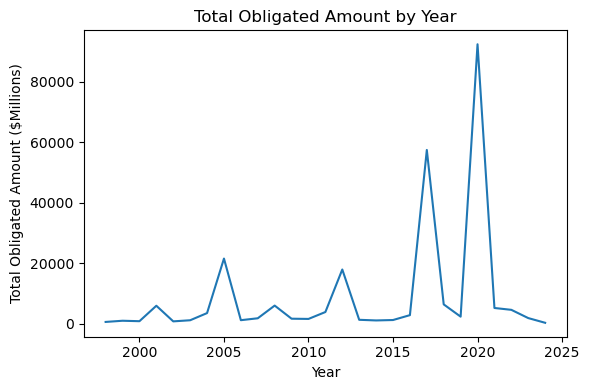

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=year_incident_df,
    x='year',
    y='totalObligatedM',
    ax=ax
)

plt.title("Total Obligated Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Obligated Amount ($Millions)")

plt.tight_layout()

In [18]:
sql = """
    SELECT
        incidentType,
        SUM(totalObligated) / 1_000_000 AS totalObligatedM
    FROM
        public_assistance
    GROUP BY 1
    ORDER BY totalObligatedM DESC
    LIMIT 10
"""

incident_df = con.sql(sql).df()

print(incident_df.shape)
incident_df.head()

(10, 2)


,incidentType,totalObligatedM
0,Hurricane,117113.386459
1,Biological,85445.046033
2,Severe Storm,13214.005583
3,Fire,6436.941693
4,Flood,5367.840143


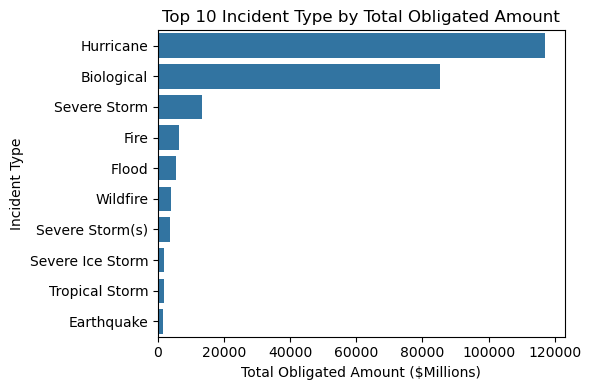

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(
    data=incident_df,
    y='incidentType',
    x='totalObligatedM',
    color="C0",
    ax=ax
)

plt.title("Top 10 Incident Type by Total Obligated Amount")
plt.ylabel("Incident Type")
plt.xlabel("Total Obligated Amount ($Millions)")

plt.tight_layout()

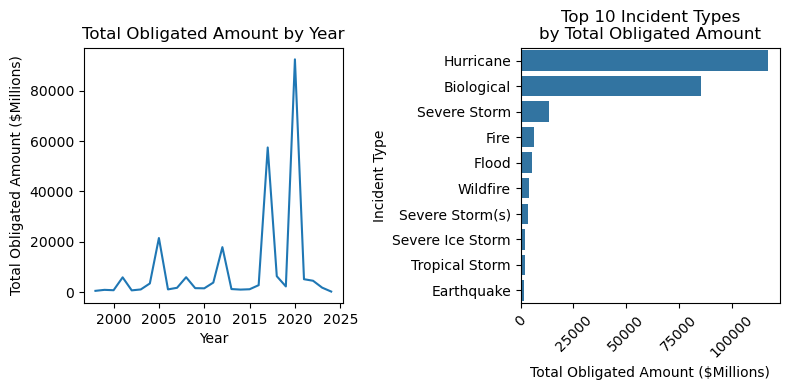

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(
    data=year_incident_df,
    x='year',
    y='totalObligatedM',
    ax=axs[0]
)

axs[0].set_title("Total Obligated Amount by Year")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Total Obligated Amount ($Millions)")

sns.barplot(
    data=incident_df,
    y='incidentType',
    x='totalObligatedM',
    color="C0",
    ax=axs[1]
)

axs[1].set_title("Top 10 Incident Types\nby Total Obligated Amount")
axs[1].set_ylabel("Incident Type")
axs[1].set_xlabel("Total Obligated Amount ($Millions)")
axs[1].tick_params(axis='x', labelrotation = 45)

plt.tight_layout()
plt.savefig('figures/year-incident.png', dpi=200, bbox_inches='tight')

In [21]:
sql = """
    SELECT
        state,
        SUM(totalObligated) AS totalObligated
    FROM
        public_assistance
    GROUP BY 1
    ORDER BY totalObligated DESC
    LIMIT 20
"""

state_df = con.sql(sql).df()

print(state_df.shape)
state_df.head()

(20, 2)


,state,totalObligated
0,New York,3.843107e+10
1,Puerto Rico,3.696876e+10
2,Louisiana,2.485656e+10
3,Texas,2.272445e+10
4,California,1.829902e+10


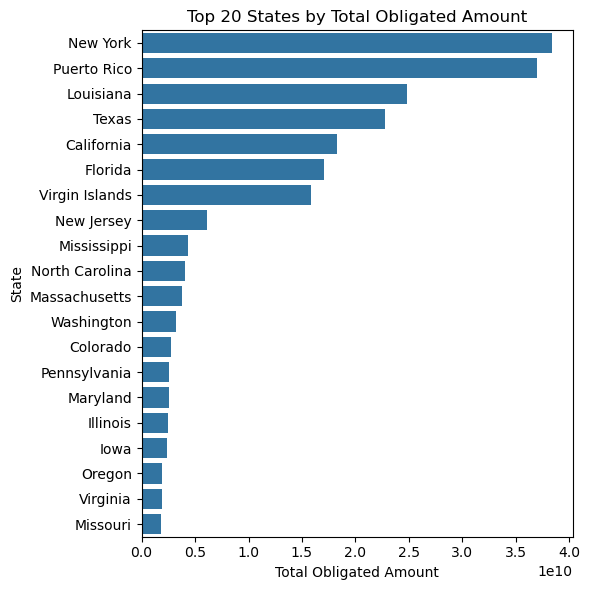

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(
    data=state_df,
    y='state',
    x='totalObligated',
    color="C0",
    ax=ax
)

plt.title("Top 20 States by Total Obligated Amount")
plt.ylabel("State")
plt.xlabel("Total Obligated Amount")

plt.tight_layout()

In [23]:
sql = """
    SELECT
        incidentType,
        state,
        SUM(totalObligated) / 1_000_000 AS totalObligatedM
    FROM
        public_assistance
    GROUP BY 1, 2
    ORDER BY
        totalObligatedM DESC
"""

incident_state_df = con.sql(sql).df()

print(incident_state_df.shape)
incident_state_df.head()

(440, 3)


,incidentType,state,totalObligatedM
0,Hurricane,Puerto Rico,35708.252002
1,Hurricane,Louisiana,21265.263657
2,Hurricane,Virgin Islands,15653.648522
3,Biological,New York,15595.931648
4,Hurricane,New York,15348.012059


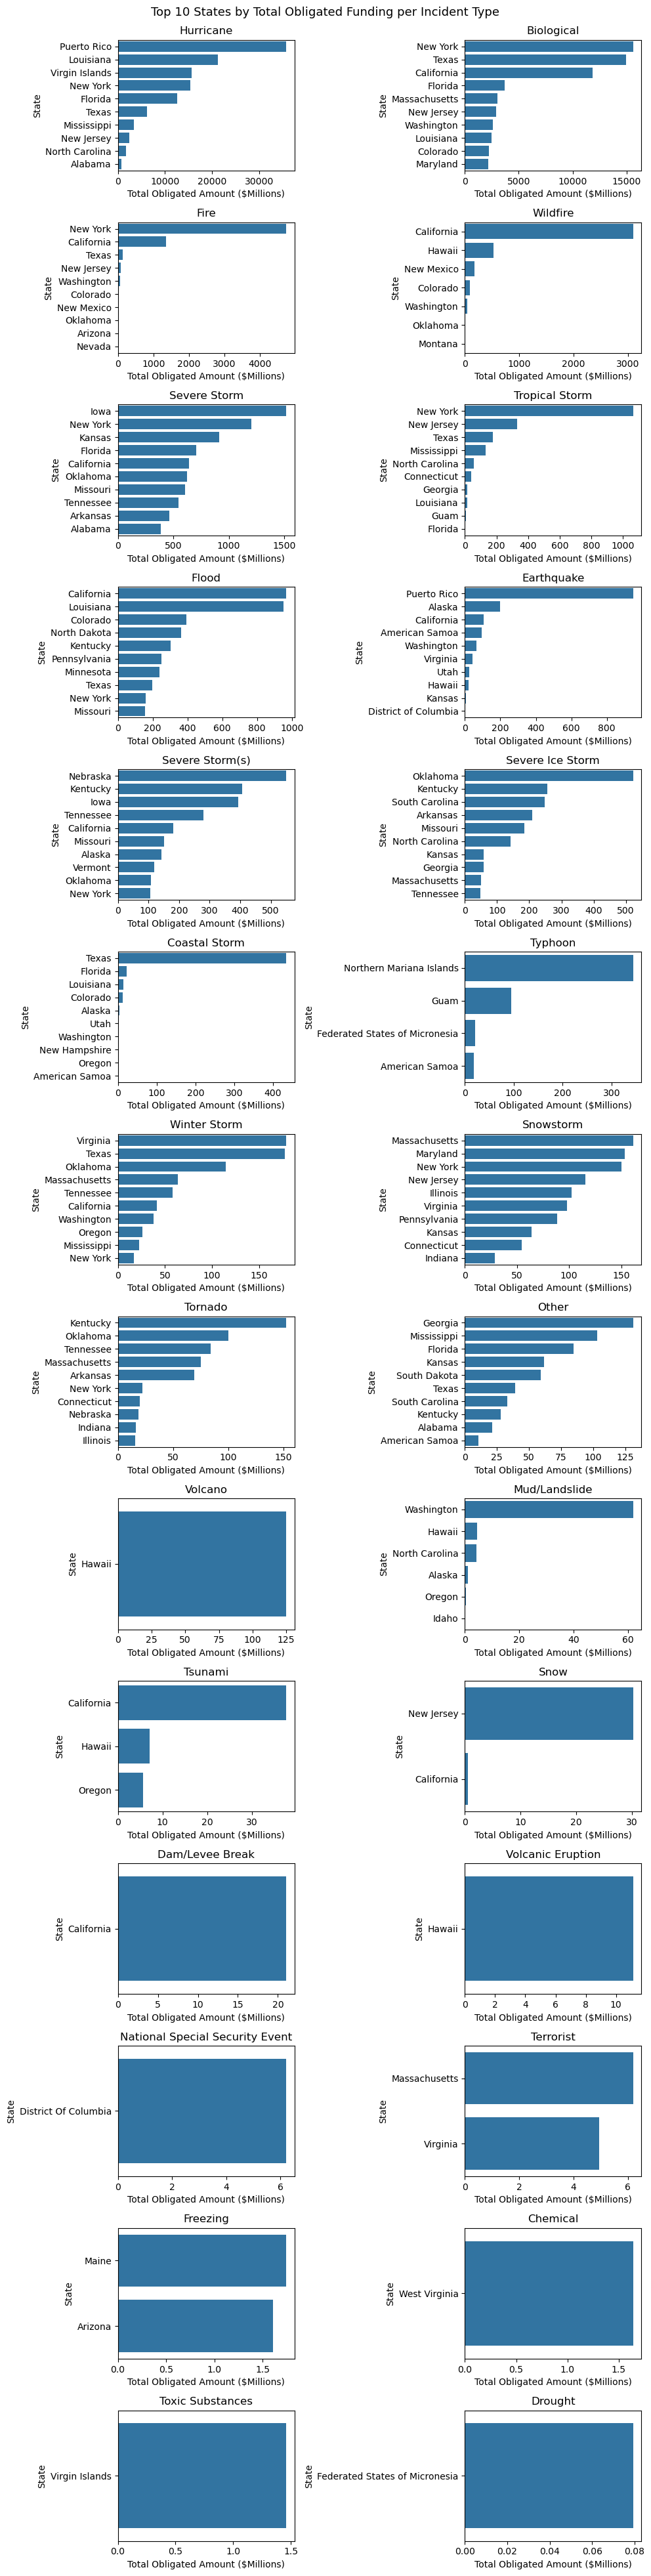

In [24]:
incidents = incident_state_df['incidentType'].unique()
fig, axs = plt.subplots(14, 2, figsize=(10, 40))
    
for incident, ax in zip(incidents, axs.flat):
    
    bar = (
        incident_state_df
        .loc[incident_state_df['incidentType'] == incident]
        .sort_values(by='totalObligatedM', ascending=False)
        .head(10)
    )
    
    sns.barplot(
        data=bar,
        y='state',
        x='totalObligatedM',
        color="C0",
        ax=ax
    )
    
    ax.set_title(incident)
    ax.set_xlabel('Total Obligated Amount ($Millions)')
    ax.set_ylabel('State')
    
plt.suptitle('Top 10 States by Total Obligated Funding per Incident Type\n\n\n', fontsize=13)    
fig.tight_layout()
fig.savefig('figures/incident-state.png', dpi=200, bbox_inches='tight')   

# Map

In [25]:
sql = """
    SELECT
        stateCode,
        SUM(totalObligated) AS totalObligated,
        SUM(totalObligated) / 1_000_000 AS totalObligatedM
    FROM
        public_assistance
    GROUP BY 1
    ORDER BY totalObligated DESC
"""

state_df = con.sql(sql).df()

print(state_df.shape)
state_df.head()

(61, 3)


,stateCode,totalObligated,totalObligatedM
0,NY,3.843107e+10,38431.074319
1,PR,3.696876e+10,36968.755634
2,LA,2.485656e+10,24856.555131
3,TX,2.272445e+10,22724.446580
4,CA,1.829902e+10,18299.020734


In [26]:
path = 'https://www2.census.gov/geo/tiger/TIGER2023/STATE/tl_2023_us_state.zip'
states_gdf = gpd.read_file(path)

print(states_gdf.shape)
states_gdf.head()

(56, 16)


,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [27]:
states_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [28]:
states_merged = states_gdf.merge(
    state_df,
    left_on='STUSPS',
    right_on='stateCode',
    how='left'
)

states_merged.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,stateCode,totalObligated,totalObligatedM
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",WV,5.321540e+08,532.154006
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",FL,1.707143e+10,17071.432602
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",IL,2.440886e+09,2440.886427
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",MN,1.098405e+09,1098.404824
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",MD,2.534980e+09,2534.980093


In [29]:
states_merged.loc[states_merged['stateCode'].isnull()]

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,stateCode,totalObligated,totalObligatedM


In [30]:
states_merged['totalObligatedkm'] = states_merged['totalObligated'] / (states_merged['ALAND'] / 1_000_000)

states_merged.head().iloc[:, -4:]

,stateCode,totalObligated,totalObligatedM,totalObligatedkm
0,WV,5.321540e+08,532.154006,8546.393455
1,FL,1.707143e+10,17071.432602,122848.087427
2,IL,2.440886e+09,2440.886427,16976.729399
3,MN,1.098405e+09,1098.404824,5325.739738
4,MD,2.534980e+09,2534.980093,100787.479767


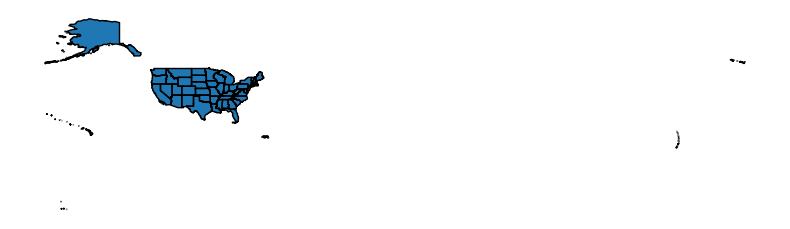

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

states_merged.plot(ax=ax)

states_gdf.plot(
    ax=ax,
    facecolor='none', 
    edgecolor='black', 
    zorder=1
)

plt.axis('off')
plt.tight_layout()

In [32]:
conus_gdf = states_merged.loc[
    (states_merged['GEOID'].astype(int) <= 56)
    & (~states_merged['GEOID'].isin(['02', '15']))
]

conus_gdf = conus_gdf.to_crs(5070)

conus_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,stateCode,totalObligated,totalObligatedM,totalObligatedkm
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((1548777.304 1961418.875, 1548791.323...",WV,5.321540e+08,532.154006,8546.393455
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((1318717.052 267177.248, 131868...",FL,1.707143e+10,17071.432602,122848.087427
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((701650.471 1724476.457, 701575.841 1...",IL,2.440886e+09,2440.886427,16976.729399
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((50386.396 2888284.096, 50544.128 288...",MN,1.098405e+09,1098.404824,5325.739738
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((1718035.440 1986172.419, 1718118.217...",MD,2.534980e+09,2534.980093,100787.479767


In [33]:
conus_gdf['totalObligatedM'].describe()

count       49.000000
mean      3863.827849
std       7468.481038
min         19.870731
25%        900.499376
50%       1301.354944
75%       2534.980093
max      38431.074319
Name: totalObligatedM, dtype: float64

In [34]:
(conus_gdf
 .sort_values(by='totalObligatedM', ascending=True)
 .loc[:, ['STUSPS', 'totalObligated', 'totalObligatedM']]
 .head(20)
)

,STUSPS,totalObligated,totalObligatedM
30,WY,1.987073e+07,19.870731
46,MT,2.140693e+08,214.069288
39,NV,2.217066e+08,221.706577
6,ID,2.903712e+08,290.371226
11,DE,3.302308e+08,330.230757
48,IN,4.053284e+08,405.328436
50,SD,4.308711e+08,430.871058
37,ME,5.048859e+08,504.885947
7,NH,5.164063e+08,516.406334
23,UT,5.225972e+08,522.597152


/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_15453/4267935328.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


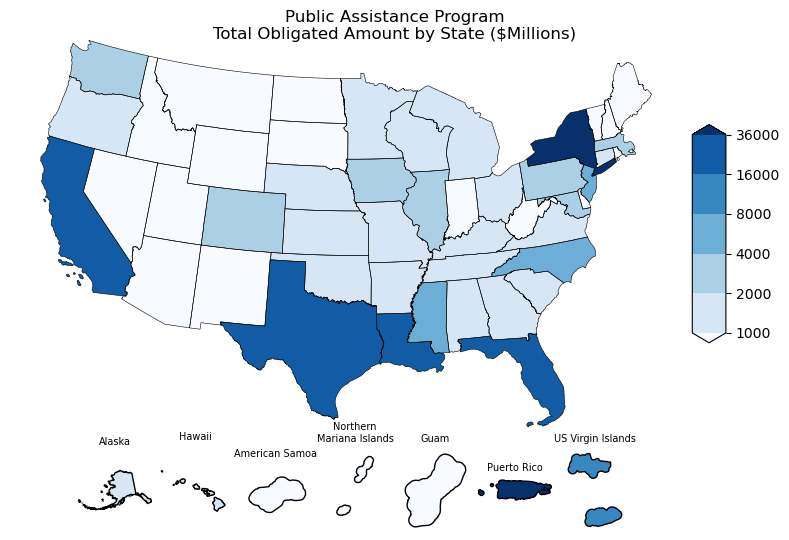

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([1000, 2000, 4000, 8000, 16000, 36000], cmap.N, extend='both')

conus_gdf.plot(
    column='totalObligatedM',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax,
)

conus_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.4,
)

alaska = fig.add_axes([.10, 0.1, 0.1, 0.1])
hawaii = fig.add_axes([.20, 0.1, 0.1, 0.1])
ams = fig.add_axes([.30, 0.1, 0.1, 0.1])
mp = fig.add_axes([.40, 0.1, 0.1, 0.1])
gu = fig.add_axes([.50, 0.1, 0.1, 0.1])
pr = fig.add_axes([.60, 0.1, 0.1, 0.1])
vi = fig.add_axes([.70, 0.1, 0.1, 0.1])

def plot_states(geoid, crs, ax, title):
    (
        states_merged
        .loc[states_merged['GEOID'].isin([geoid])]
        .to_crs(crs)
        .plot(
         column='totalObligatedM',
        legend=True,
        cmap=cmap,
        cax=cax,
        norm=norm,
        ax=ax,
        edgecolor='black'
        )
        .set_title(title, fontsize=7)
    )
    
plot_states('02', 3338, alaska, 'Alaska')   
plot_states('15', 3760, hawaii, 'Hawaii')  
plot_states('60', 3102, ams, 'American Samoa')  
plot_states('69', 3993, mp, 'Northern\nMariana Islands')
plot_states('66', 3993, gu, 'Guam') 
plot_states('72', 4326, pr, 'Puerto Rico')  
plot_states('78', 3991, vi, 'US Virgin Islands') 
  
ax.axis('off')
ams.axis('off')
ams.set_xlim(left=150_000, right=350_000)
ams.set_ylim(bottom=250_000, top=375_000)
gu.axis('off')
mp.axis('off')
mp.set_ylim(bottom=None, top=275_000)
pr.axis('off')
vi.axis('off')
hawaii.axis('off')
hawaii.set_xlim(50000)
hawaii.set_ylim(bottom=None, top=1000000)
alaska.axis('off')

fig.suptitle('Public Assistance Program\nTotal Obligated Amount by State ($Millions)', y=.75)
fig.tight_layout()
fig.savefig('figures/total-obligated-map.png', dpi=200, bbox_inches='tight')

In [36]:
conus_gdf['totalObligatedkm'].describe()

count    4.900000e+01
mean     1.900542e+05
std      1.002653e+06
min      7.902202e+01
25%      6.338139e+03
50%      1.028361e+04
75%      3.531452e+04
max      7.040894e+06
Name: totalObligatedkm, dtype: float64

In [37]:
(conus_gdf
 .sort_values(by='totalObligatedkm', ascending=False)
 .loc[:, ['STUSPS', 'totalObligated', 'totalObligatedM', 'ALAND', 'totalObligatedkm']]
 .head(20)
)[['STUSPS', 'totalObligatedkm']].round()

,STUSPS,totalObligatedkm
53,DC,7040894.0
5,RI,336288.0
14,NJ,320186.0
38,NY,314882.0
20,LA,222071.0
51,MA,184697.0
1,FL,122848.0
10,CT,108850.0
4,MD,100787.0
11,DE,65435.0


/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_15453/2748468916.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


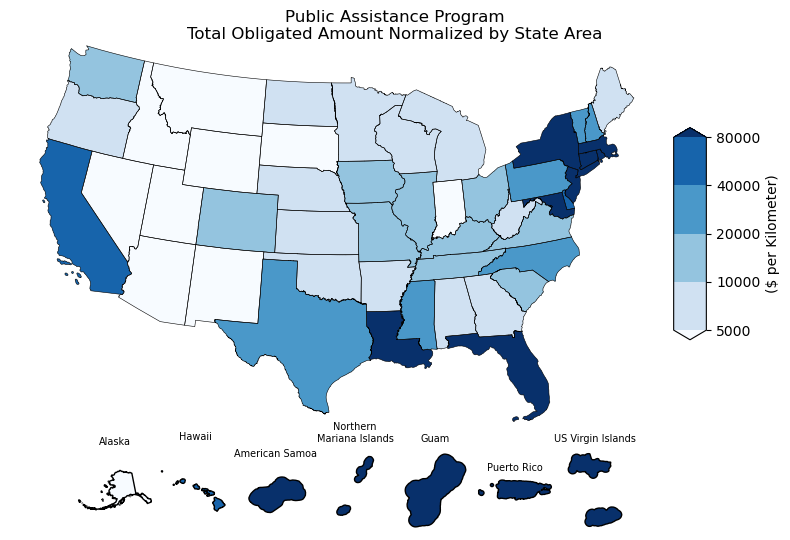

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.cm.Blues
norm = mpl.colors.BoundaryNorm([5_000, 10_000, 20_000, 40_000, 80_000], cmap.N, extend='both')

conus_gdf.plot(
    column='totalObligatedkm',
    legend=True,
    cmap=cmap,
    cax=cax,
    norm=norm,
    ax=ax
)

conus_gdf.plot(
    ax=ax,
    zorder=1,
    facecolor='None',
    linewidth=.4,
)

alaska = fig.add_axes([.10, 0.1, 0.1, 0.1])
hawaii = fig.add_axes([.20, 0.1, 0.1, 0.1])
ams = fig.add_axes([.30, 0.1, 0.1, 0.1])
mp = fig.add_axes([.40, 0.1, 0.1, 0.1])
gu = fig.add_axes([.50, 0.1, 0.1, 0.1])
pr = fig.add_axes([.60, 0.1, 0.1, 0.1])
vi = fig.add_axes([.70, 0.1, 0.1, 0.1])

def plot_states(geoid, crs, ax, title):
    (
        states_merged
        .loc[states_merged['GEOID'].isin([geoid])]
        .to_crs(crs)
        .plot(
         column='totalObligatedkm',
        legend=True,
        cmap=cmap,
        cax=cax,
        norm=norm,
        ax=ax,
        edgecolor='black'
        )
        .set_title(title, fontsize=7)
    )
    
plot_states('02', 3338, alaska, 'Alaska')   
plot_states('15', 3760, hawaii, 'Hawaii')  
plot_states('60', 3102, ams, 'American Samoa')  
plot_states('69', 3993, mp, 'Northern\nMariana Islands')
plot_states('66', 3993, gu, 'Guam') 
plot_states('72', 4326, pr, 'Puerto Rico')  
plot_states('78', 3991, vi, 'US Virgin Islands') 
  
ax.axis('off')
ams.axis('off')
ams.set_xlim(left=150_000, right=350_000)
ams.set_ylim(bottom=250_000, top=375_000)
gu.axis('off')
mp.axis('off')
mp.set_ylim(bottom=None, top=275_000)
pr.axis('off')
vi.axis('off')
hawaii.axis('off')
hawaii.set_xlim(50000)
hawaii.set_ylim(bottom=None, top=1000000)
alaska.axis('off')

cax.set_ylabel('($ per Kilometer)')

fig.suptitle('Public Assistance Program\nTotal Obligated Amount Normalized by State Area', y=.75)
fig.tight_layout()
fig.savefig('figures/total-obligated-normalized-map.png', dpi=200, bbox_inches='tight')